In [1]:
import sys
sys.path.append('../')

import os

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import seaborn as sns

pio.renderers.default = "png" # For GitHub rendering

In [3]:
sim_df = pd.read_pickle(
    "../data/simulations/reward_split_sweep-2023-12-21_21-35-31.pkl.gz"
)

In [4]:
sim_df = sim_df.set_index(['label', 'run', 'days_passed'])

<Axes: xlabel='days_passed', ylabel='circulating_supply'>

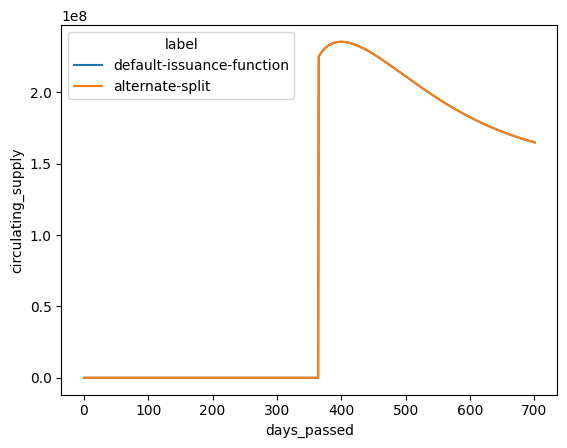

In [5]:
sns.lineplot(sim_df, x='days_passed', y='circulating_supply', hue='label')

<Axes: xlabel='days_passed', ylabel='operator_pool_shares'>

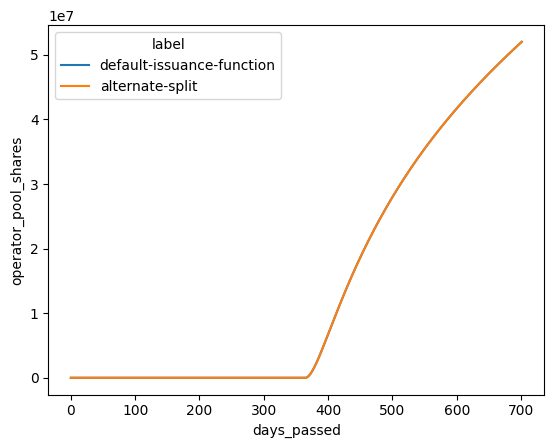

In [6]:
sns.lineplot(sim_df, x='days_passed', y='operator_pool_shares', hue='label')

<Axes: xlabel='days_passed', ylabel='nominator_pool_shares'>

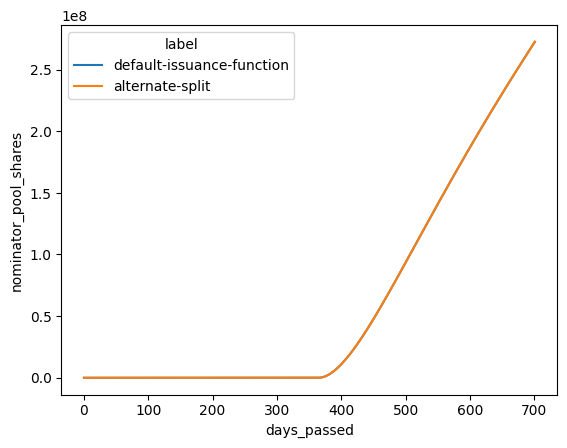

In [7]:
sns.lineplot(sim_df, x='days_passed', y='nominator_pool_shares', hue='label')

<Axes: xlabel='days_passed', ylabel='block_utilization'>

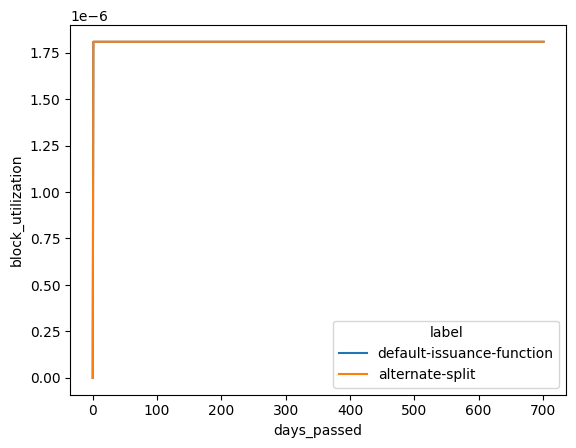

In [8]:
sns.lineplot(sim_df, x='days_passed', y='block_utilization', hue='label')

<Axes: xlabel='days_passed', ylabel='circulating_supply'>

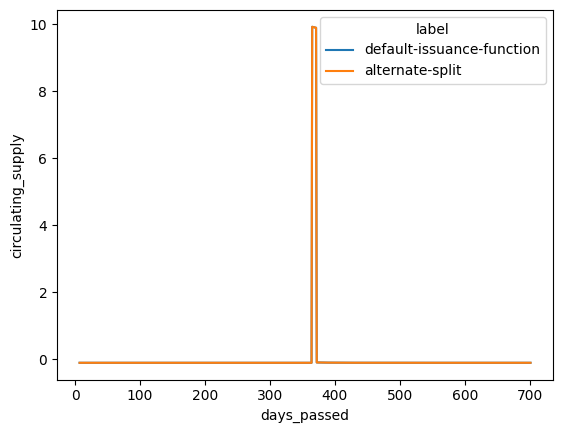

In [10]:
from subspace_model.trajectory_metrics import *


lst = []
for i, g_df in sim_df.groupby('run'):
    s = window_volatility(g_df.circulating_supply.diff()).reset_index()
    lst.append(s)

df = pd.concat(lst).dropna()
sns.lineplot(df, x='days_passed', y='circulating_supply', hue='label')